In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split
from sklearn.svm import SVC
from sklearn.cross_validation import KFold, cross_val_score

In [3]:
# read data and check the shape
credit_df = pd.read_csv('creditcard/creditcard.csv')
credit_df.shape

(284807, 31)

In [14]:
credit_df.isnull().any().any() #check if  any null exists. Returning false, represents no null in data
credit_df.dtypes 
credit_df.head(6)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0


In [11]:
# show the imbalance characteristic
class_count = credit_df.groupby('Class')['Class'].count()
fraud_ratio = class_count[1]/class_count[0]
print(class_count)
print(fraud_ratio)

Class
0    284315
1       492
Name: Class, dtype: int64
0.0017304750013189597


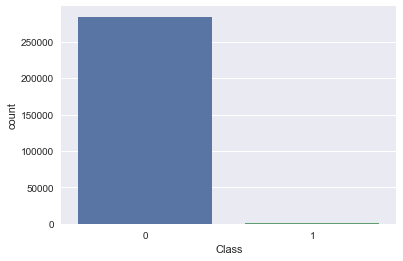

In [28]:
# visulazation imbalance issue in data
imbalance_vis = sns.countplot(x="Class", data=credit_df)

# solve imbalance issue
## undersampling method. 
Undersampling is one of the techniques used for handling class imbalance. In this technique, we under sample majority class to match the minority class. So in our example, we take random sample of non-fraud class to match number of fraud samples. This makes sure that the training data has equal amount of fraud and non-fraud samples.

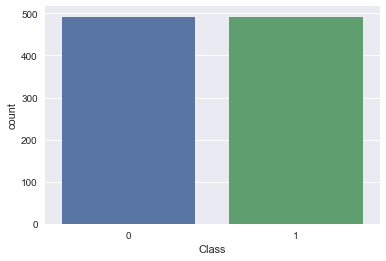

In [29]:
# find number of transactions labeled 1 (fraud)
len_frauds = len(credit_df[credit_df.Class == 1])
# Get indices of non fraud transactions
non_fraud_indices = credit_df[credit_df.Class == 0].index
# Randomly choose non fraud indices without replacement when replace=False
random_indices = np.random.choice(non_fraud_indices,len_frauds, replace=False)
# Find the indices of fraud transactions
fraud_indices = credit_df[credit_df.Class == 1].index
# Concat fraud indices with sample non-fraud ones
under_sample_indices = np.concatenate([fraud_indices,random_indices])
# Get Balance Dataframe
under_sample = credit_df.loc[under_sample_indices]
# undersampling visulazation
under_sample_vis = sns.countplot(x="Class", data=under_sample)

In [32]:
# select features
y_target = under_sample.Class
X_data = under_sample.drop(['Time','Class'], axis=1)
X_data.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00


In [38]:
# scale data make range of data is between 0 and 1
scaler = MinMaxScaler()
scaler.fit(X_data)
scale_X_data = scaler.transform(X_data)
scale_X_data[0:5,:]

array([[8.57097521e-01, 4.26302262e-01, 8.60313686e-01, 4.97108430e-01,
        6.50088570e-01, 3.86612882e-01, 8.31038047e-01, 6.95084306e-01,
        5.57046415e-01, 6.49475172e-01, 3.90619078e-01, 7.56298409e-01,
        4.08042238e-01, 5.76144649e-01, 7.01356755e-01, 7.52141040e-01,
        7.00038087e-01, 7.13513366e-01, 4.60016431e-01, 3.08072132e-01,
        4.66292594e-01, 5.13187233e-01, 7.60060386e-01, 7.31214181e-01,
        6.90451020e-01, 3.47085408e-01, 7.29424581e-01, 3.28113322e-01,
        0.00000000e+00],
       [8.34901909e-01, 2.80513359e-01, 9.39021529e-01, 3.91207459e-01,
        7.06774047e-01, 4.14696118e-01, 8.89039959e-01, 6.71179052e-01,
        6.87591988e-01, 7.07042157e-01, 1.40656243e-01, 8.71142102e-01,
        6.12939331e-01, 6.76403946e-01, 9.32467341e-01, 8.56806827e-01,
        8.07547125e-01, 8.44609410e-01, 4.45021235e-01, 4.33103428e-01,
        4.69181839e-01, 5.40465713e-01, 8.34539969e-01, 5.40019987e-01,
        7.24111263e-01, 2.64892813e-01,

In [44]:
# split data into traning set and testing set
X_train, X_test, y_train, y_test = train_test_split(scale_X_data, y_target, test_size=0.33, random_state=42)

In [45]:
print('total training observation {}'.format(X_train.shape))
print('total teasting observation {}'.format(X_test.shape))

total training observation (659, 29)
total teasting observation (325, 29)


In [54]:
clf = SVC(C=10.0, kernel='rbf')
clf.fit(X_train,y_train)
clf.score(X_test, y_test)  

0.916923076923077

In [55]:
# cross-validation 10 fold
clf = SVC(C=10.0, kernel='rbf')
scores = cross_val_score(clf, scale_X_data, y_target, cv=10)
scores.mean()    

0.9266938775510205

In [57]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
scoring = ['precision_macro', 'recall_macro']
clf = SVC(kernel='rbf', C=10.0)
scores = cross_validate(clf, scale_X_data, y_target, scoring=scoring,cv=10, return_train_score=False)
scores['test_recall_macro'].mean()                      

0.9266938775510205

## SMOTE and MSMOTE methods


In [60]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scale_X_data, y_target, test_size=0.33, random_state=42)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (659, 29)
Number transactions y_train dataset:  (659,)
Number transactions X_test dataset:  (325, 29)
Number transactions y_test dataset:  (325,)
